In [1]:
%load_ext lab_black

In [2]:
import sys
import os

# Add the parent folder to path to be able to easily access other agents
sys.path.append(os.path.abspath(os.path.join("..")))
# print("\n".join(sys.path))

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from luxai_s2.env import LuxAI_S2
import matplotlib.pyplot as plt
import numpy as np

from util import figures_to_subplots

# Import agents to work with
from agent_v5.agent import Agent

INFO:root:Starting Log
INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [5]:
# def animate(imgs, _return=True):
#     """
#     Combines images to make a video that can be rendered in notebook
#     Returns:
#         video generated from images
#     """
#     # using cv2 to generate videos as moviepy doesn't work on kaggle notebooks
#     import cv2
#     import os
#     import string
#     import random

#     vid_dir = "_videos"
#     os.makedirs(vid_dir, exist_ok=True)

#     video_name = (
#         "".join(random.choice(string.ascii_letters) for i in range(18)) + ".webm"
#     )
#     video_name = os.path.join(vid_dir, video_name)
#     height, width, layers = imgs[0].shape
#     fourcc = cv2.VideoWriter_fourcc(*"VP90")
#     video = cv2.VideoWriter(video_name, fourcc, 10, (width, height))

#     for img in imgs:
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         video.write(img)
#     video.release()
#     if _return:
#         from IPython.display import Video

#         return Video(video_name)


# def interact(env, agents, steps):
#     """
#     Plays the agents against each other for the first <steps> of the game
#     Returns:
#        a video of game"""
#     # reset our env
#     obs = env.reset(seed=41)
#     np.random.seed(0)
#     imgs = []
#     step = 0
#     # Note that as the environment has two phases, we also keep track a value called
#     # `real_env_steps` in the environment state. The first phase ends once `real_env_steps` is 0 and used below

#     # iterate until phase 1 ends
#     while env.state.real_env_steps < 0:
#         if step >= steps:
#             break
#         actions = {}
#         for player in env.agents:
#             o = obs[player]
#             a = agents[player].early_setup(step, o)
#             actions[player] = a
#         step += 1
#         obs, rewards, dones, infos = env.step(actions)
#         imgs += [env.render("rgb_array", width=640, height=640)]
#     done = False
#     while not done:
#         if step >= steps:
#             break
#         actions = {}
#         for player in env.agents:
#             o = obs[player]
#             a = agents[player].act(step, o)
#             actions[player] = a
#         step += 1
#         obs, rewards, dones, infos = env.step(actions)
#         imgs += [env.render("rgb_array", width=640, height=640)]
#         done = dones["player_0"] and dones["player_1"]
#     return animate(imgs)

# Make Video of Agents playing

In [6]:
# env = LuxAI_S2()  # create the environment object
# agents = {player: Agent(player, env.state.env_cfg) for player in env.possible_agents}
# interact(env, agents, 25)

# Working with env one step at a time

In [7]:
from util import show_env

env = LuxAI_S2()

## Early Setup Phase

INFO:root:initializing agent for player player_0
INFO:root:initializing agent for player player_1
INFO:root:player_0 Beginning of step update for step 0
INFO:root:player_0 Early setup action {'faction': 'TheBuilders', 'bid': 0}
INFO:root:player_1 Beginning of step update for step 0
INFO:root:player_1 Early setup action {'faction': 'TheBuilders', 'bid': 0}
INFO:root:player_0 Beginning of step update for step 1
INFO:root:player_0 Early setup action {'spawn': (28, 16), 'metal': 150, 'water': 150}
INFO:root:player_1 Beginning of step update for step 1
INFO:root:player_1 Early setup action {}
INFO:root:player_0 Beginning of step update for step 2
INFO:root:player_0 Early setup action {}
INFO:root:player_1 Beginning of step update for step 2
INFO:root:player_1 Early setup action {'spawn': (4, 9), 'metal': 150, 'water': 150}
INFO:root:player_0 Beginning of step update for step 3
INFO:root:player_0 Early setup action {'spawn': (12, 2), 'metal': 150, 'water': 150}
INFO:root:player_1 Beginning o

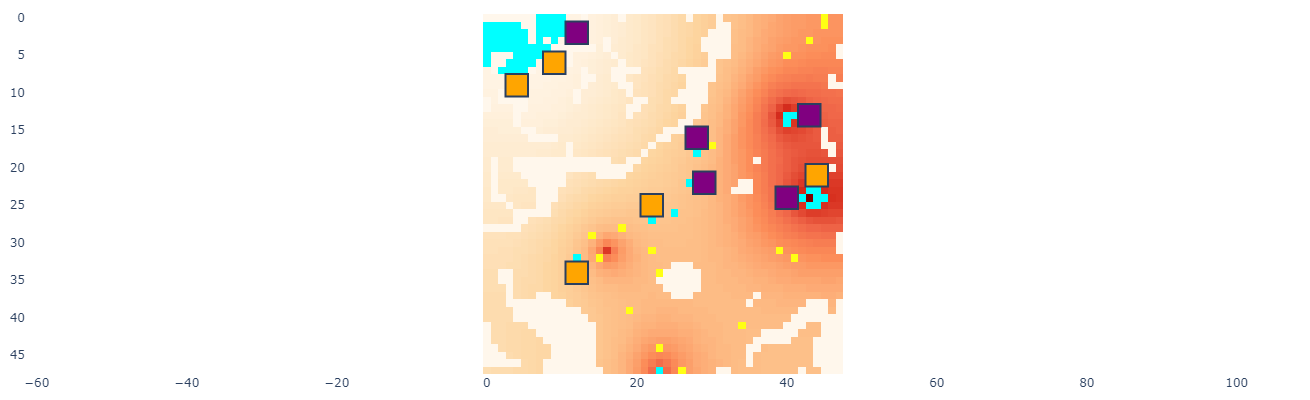

In [8]:
# Run the early_setup phase
agents = {player: Agent(player, env.state.env_cfg) for player in env.possible_agents}
agent = agents["player_0"]
# obs = env.reset(seed=42)  # resets an environment with a seed
obs = env.reset(seed=178220973)  # resets an environment with a seed
step = 0

while env.state.real_env_steps < 0:
    actions = {}
    for player in env.agents:
        o = obs[player]
        acts = agents[player].early_setup(step, o)
        actions[player] = acts
    step += 1
    obs, rewards, dones, infos = env.step(actions)
# plt.imshow(env.render("rgb_array", width=640, height=640))
show_env(env)

## Run one step at a time

In [9]:
# Advance to later state
while env.state.real_env_steps < 5:
    print(f"Carrying out real step {step}, env step {env.state.real_env_steps}")
    actions = {player: agent.act(step, obs[player]) for player, agent in agents.items()}
    step += 1
    obs, rewards, dones, infos = env.step(actions)

INFO:root:player_0 Beginning of step update for step 11
INFO:root:factory_0 building Heavy
INFO:root:factory_2 building Heavy
INFO:root:factory_4 building Heavy
INFO:root:factory_6 building Heavy
INFO:root:factory_8 building Heavy
INFO:root:player_0 player_0 Factory actions: {'factory_0': 1, 'factory_2': 1, 'factory_4': 1, 'factory_6': 1, 'factory_8': 1}
INFO:root:player_1 Beginning of step update for step 11
INFO:root:factory_1 building Heavy
INFO:root:factory_3 building Heavy
INFO:root:factory_5 building Heavy
INFO:root:factory_7 building Heavy
INFO:root:factory_9 building Heavy
INFO:root:player_1 player_1 Factory actions: {'factory_1': 1, 'factory_3': 1, 'factory_5': 1, 'factory_7': 1, 'factory_9': 1}
INFO:root:player_0 Beginning of step update for step 12
INFO:root:player_0 unit_10 assigned to mine_ice (for factory_0)


Carrying out real step 11, env step 0
Carrying out real step 12, env step 1


INFO:root:player_0 unit_11 assigned to mine_ice (for factory_2)
INFO:root:player_0 unit_12 assigned to mine_ice (for factory_4)
INFO:root:player_0 unit_13 assigned to mine_ice (for factory_6)
INFO:root:player_0 unit_14 assigned to mine_ice (for factory_8)
INFO:root:player_0 player_0 Factory actions: {}
INFO:root:player_1 Beginning of step update for step 12
INFO:root:player_1 unit_15 assigned to mine_ice (for factory_1)
INFO:root:player_1 unit_16 assigned to mine_ice (for factory_3)
INFO:root:player_1 unit_17 assigned to mine_ice (for factory_5)
INFO:root:player_1 unit_18 assigned to mine_ice (for factory_7)
INFO:root:player_1 unit_19 assigned to mine_ice (for factory_9)
INFO:root:player_1 player_1 Factory actions: {}
INFO:root:player_0 Beginning of step update for step 13
INFO:root:player_0 player_0 Factory actions: {}
INFO:root:player_1 Beginning of step update for step 13
INFO:root:player_1 player_1 Factory actions: {}
INFO:root:player_0 Beginning of step update for step 14
INFO:roo

Carrying out real step 13, env step 2
Carrying out real step 14, env step 3
Carrying out real step 15, env step 4


In [10]:
# # Kill a specific factory
# env.state.factories["player_0"]["factory_0"].cargo.water = 0

# Kill a specific unit
from luxai_s2.actions import SelfDestructAction

unit = env.state.units["player_0"]["unit_11"]
unit.action_queue = [SelfDestructAction()]

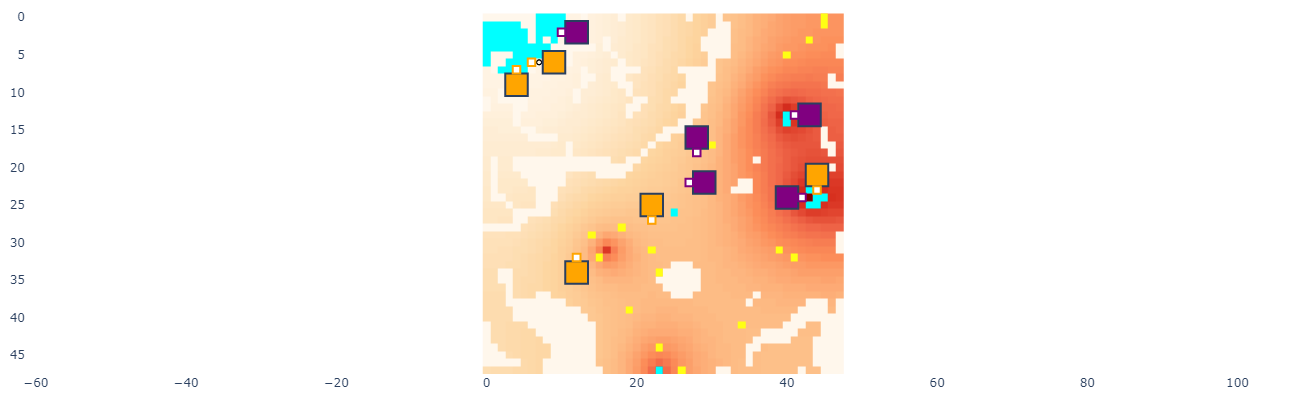

In [11]:
show_env(env)

INFO:root:player_0 Beginning of step update for step 16
INFO:root:player_0 player_0 Factory actions: {}
INFO:root:player_1 Beginning of step update for step 16
INFO:root:player_1 player_1 Factory actions: {}


Carrying out real step 16, env step 5


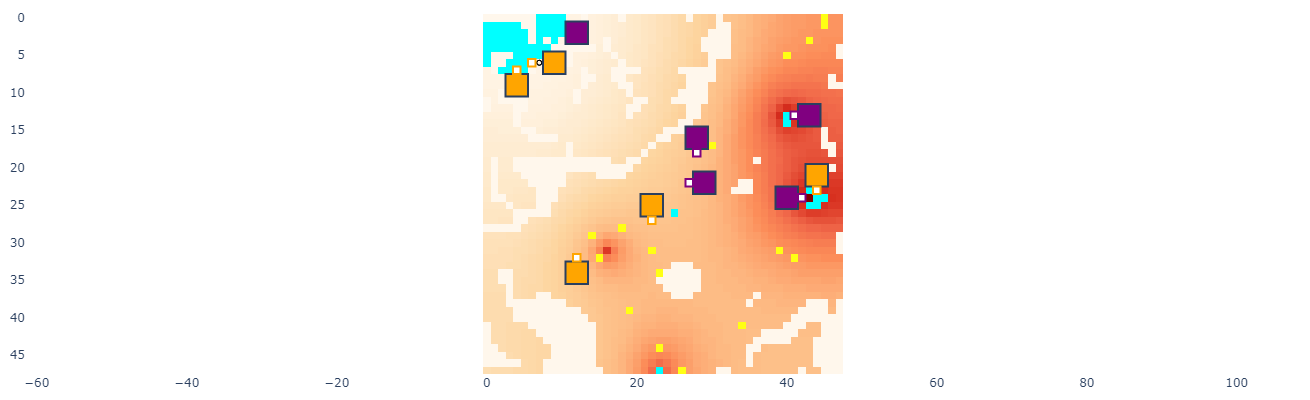

In [12]:
# Step one at a time
print(f"Carrying out real step {step}, env step {env.state.real_env_steps}")
actions = {player: agent.act(step, obs[player]) for player, agent in agents.items()}
step += 1
obs, rewards, dones, infos = env.step(actions)

show_env(env)

In [13]:
agent = agents["player_0"]
f = agent.master.factories.friendly["factory_2"]

In [14]:
f.factory.cargo

UnitCargo(ice=0, ore=0, water=145, metal=50)

In [15]:
a = env.get_state().units["player_0"]["unit_11"]
t = a.action_queue[-1]

KeyError: 'unit_11'

# Development Below Here

In [ ]:
raise Exception('Below here is for development')

In [16]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from typing import Tuple

from util import (
    count_connected_values,
    convolve_array_kernel,
    factory_map_kernel,
    manhattan_kernel,
)


def add_map(fig, map_array, row=None, col=None):
    fig.add_trace(
        go.Heatmap(
            z=map_array.T,
            # colorscale="OrRd",
            # name="Rubble",
            # uid=f'{step}_Rubble',
            # showscale=False,
        ),
        row=row,
        col=col,
    )
    fig.update_yaxes(
        # scaleanchor="x",
        autorange="reversed",
    )
    return fig

## Thinking about how to value areas on map based on rubble

In [17]:
game_state = agent.master.game_state
# rubble = game_state.board.rubble[35:45, 35:43]
rubble = game_state.board.rubble
rubble

array([[ 0,  0,  1, ...,  0,  0, 19],
       [ 0,  0,  1, ...,  0,  0, 20],
       [ 0,  1,  1, ...,  0,  0, 20],
       ...,
       [48, 48, 48, ...,  0,  0,  0],
       [48, 48, 48, ...,  0,  0,  0],
       [48, 48, 48, ...,  0,  0,  0]])

### Value based on connected zeros

In [18]:
count_arr = count_connected_values(rubble, value=0)
print(count_arr)

[[13 13  0 ... 13 13  0]
 [13 13  0 ... 13 13  0]
 [13  0  0 ... 13 13  0]
 ...
 [ 0  0  0 ... 58 58 58]
 [ 0  0  0 ... 58 58 58]
 [ 0  0  0 ... 58 58 58]]


^ That gives how many connected zeros at any point

Let's evaluate the value based on a convolution (where the middle is blanked out by the factory placement)

In [19]:
factory_map_kernel(2, dist_multiplier=0.5)

array([[0.125, 0.25 , 0.5  , 0.5  , 0.5  , 0.25 , 0.125],
       [0.25 , 0.5  , 1.   , 1.   , 1.   , 0.5  , 0.25 ],
       [0.5  , 1.   , 0.   , 0.   , 0.   , 1.   , 0.5  ],
       [0.5  , 1.   , 0.   , 0.   , 0.   , 1.   , 0.5  ],
       [0.5  , 1.   , 0.   , 0.   , 0.   , 1.   , 0.5  ],
       [0.25 , 0.5  , 1.   , 1.   , 1.   , 0.5  , 0.25 ],
       [0.125, 0.25 , 0.5  , 0.5  , 0.5  , 0.25 , 0.125]])

### All in one

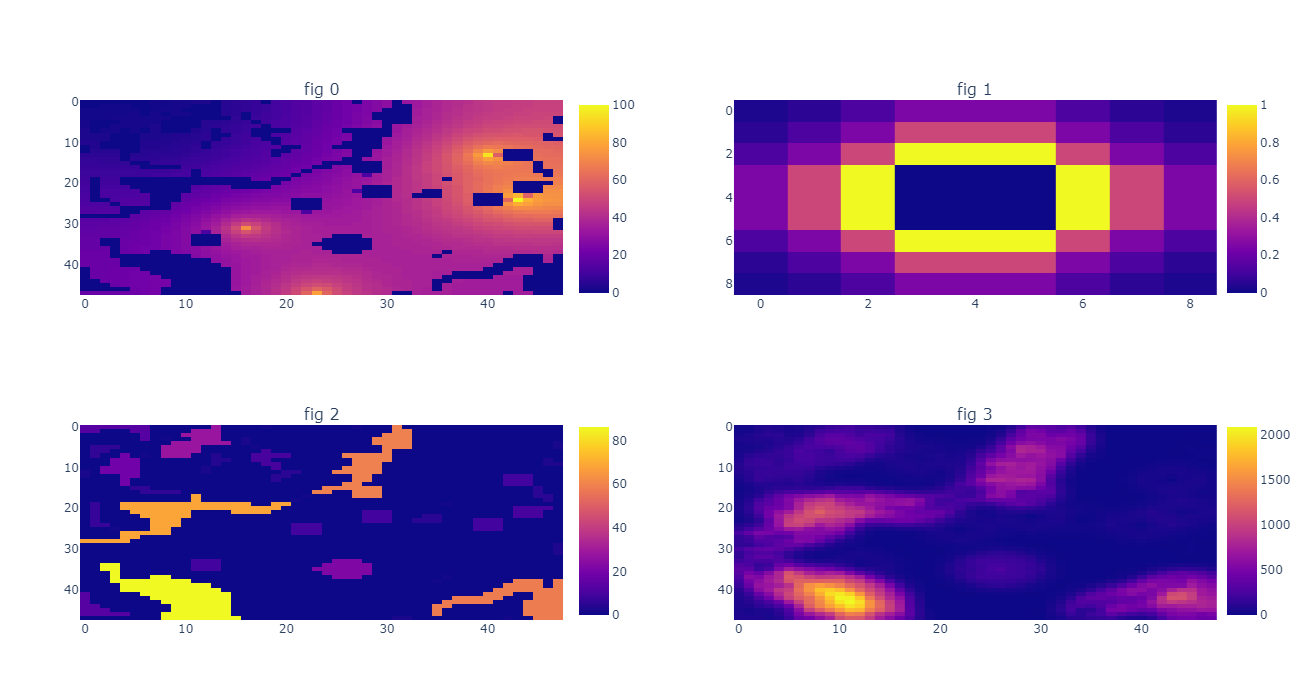

In [20]:
game_state = agent.master.game_state
rubble = game_state.board.rubble
count_arr = count_connected_values(rubble, value=0)

kernel = factory_map_kernel(3, dist_multiplier=0.5)

conv_count_arr = convolve_array_kernel(count_arr, kernel)

figs = []
for i, arr in enumerate((rubble, kernel, count_arr, conv_count_arr)):
    fig = go.Figure()
    add_map(fig, arr)
    figs.append(fig)
fig = figures_to_subplots(figs)
fig.update_layout(height=700, width=800)
fig.update_yaxes(
    autorange="reversed",
)
fig.show()

## How to value areas based best place to rubble clear

Aiming to calculate best area near factory to clear rubble to increase total area of zeros connected to factory for lichen growth

Todos:
- Convert rubble to something rounded into units of light/heavy mine quantity (i.e. rubble 1 and 17 are equally bad for heavy that can mine 20 at a time)
- Main weighting should come from what is good for the factory
    - Some combination of generally low rubble areas nearby (quicker to clear)
    - Specific rubble areas that would connect to larger areas of zeros (or at least low rubble)
- weight toward location of unit
- Once I have a way to generate maps of high value areas to clear
    - Calculate best route one step at a time, each time using the previous answer and adding one new step (but calculating a new path back to factory at the end)

### Relevant Info
Info is for Light, heavy is 20x higher unless specified
- Max power: 150
- Power gain: 1  (10 for Heavy)
- Move cost: 1+0.05\*rubble
- Rubble dig cost: 5
- Rubble dig amount: 2

Something like 20 digs on a full tank for a light unit (accounting for some move cost on rubble, and dig cost, but effectively free travel on zero rubble tiles)

In [68]:
from util import (
    pad_and_crop,
    connected_factory_zeros,
    append_zeros,
    create_boundary_array,
    SubsetExtractor,
    manhattan_distance_between_values
)


In [69]:
# # Testing pad_and_crop
# x1, y1 = 30, 5
# new_arr = pad_and_crop(np.ones((54, 15)), rubble, x1, y1)
# fig = add_map(go.Figure(), new_arr).update_layout(height=500, width=600)
# fig.add_trace(go.Scatter(x=[x1], y=[y1]))
# fig.show()

In [70]:
# # Testing SubsetExtractor
# # all within bounds
# # x1, y1 = 16, 31
# # cx, cy = (18, 32)

# # extending outside of bounds
# x1, y1 = 27, 0
# cx, cy = (29, 3)

# extractor = SubsetExtractor(rubble, (cx, cy), radius=7)
# new_arr = extractor.get_subset()
# nx1, ny1 = extractor.convert_coordinate((x1, y1))
# figs = []

# for arr, x, y in zip([rubble, new_arr], [x1, nx1], [y1, ny1]):
#     fig = add_map(go.Figure(), arr).update_layout(height=500, width=600)
#     fig.add_trace(go.Scatter(x=[x], y=[y]))
#     figs.append(fig)
# fig = figures_to_subplots(figs).update_layout(height=500, width=1000)
# fig.update_yaxes(
#     # scaleanchor="x",
#     autorange="reversed",
# )
# fig.show()

### First calculate a general value map for a singe factory with no specific unit position

This will be the map that is used to make recommendations for what rough area is a good place to remove rubble from. 

After this, I will focus on a more specific cost including the position of a single unit (for calculating a route to mine rubble)

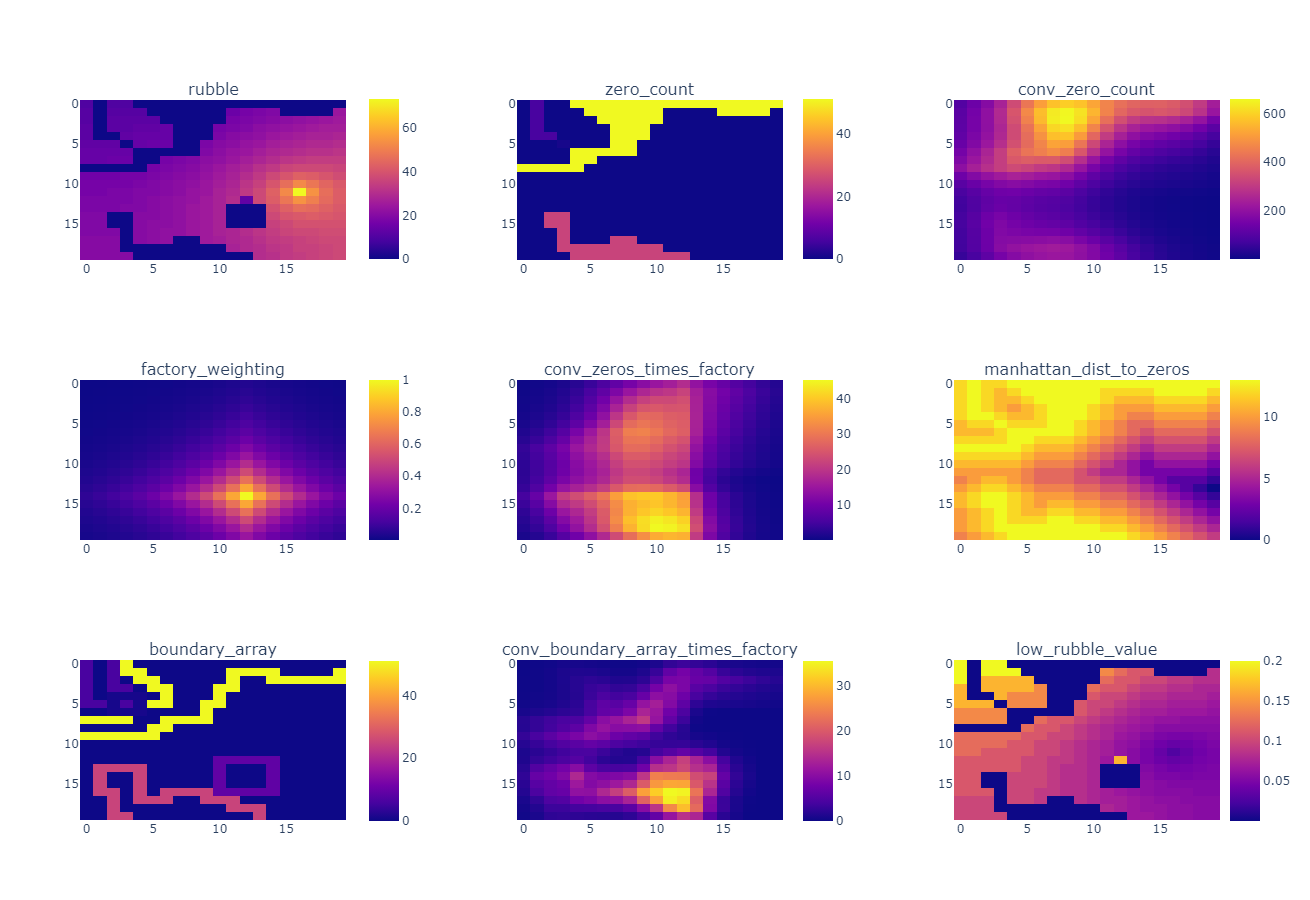

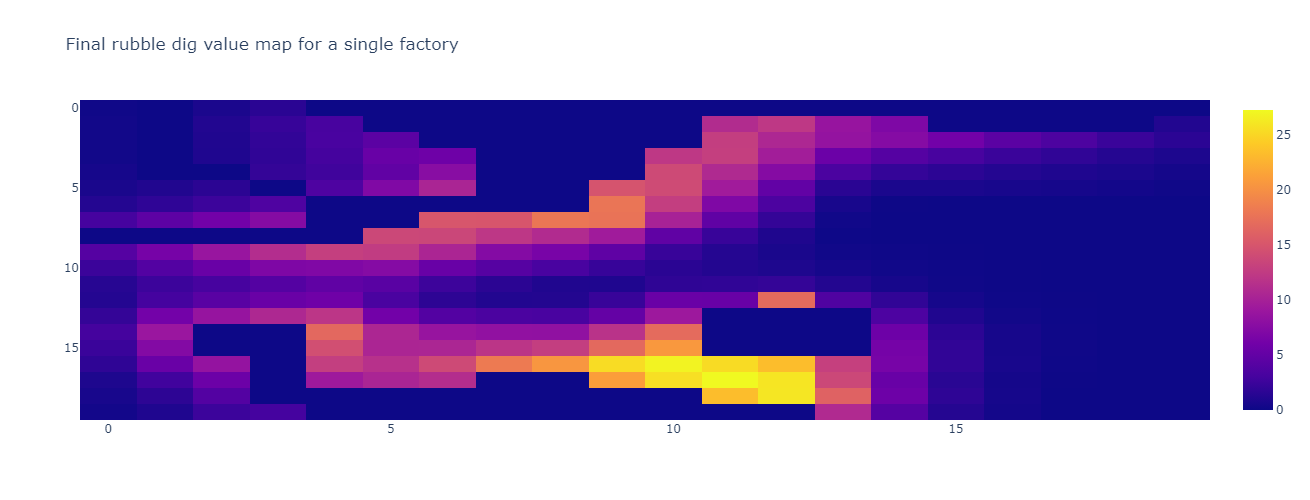

In [71]:
# Example Factory location
factory_pos = [12, 34]

# Distance around factory to create a weighting related to manhattan distance
factory_dist = 30
factory_dist_dropoff = 0.8

# Rough area a unit would consider mining in for a single mining trip
# Note: might want to make this smaller since only ~20 digs per trip
unit_dist = 10
unit_dist_dropoff = 0.8

# Smoothing zeroes array
smoothing_kernel = 0.7 ** manhattan_kernel(10)

# Reduce size of map we're looking at for now
x_min, x_max, y_min, y_max = 0, 20, 20, 40
# x_min, x_max, y_min, y_max = 8, 13, 34, 39
factory_pos = [factory_pos[0] - x_min, factory_pos[1] - y_min]

rubble = game_state.board.rubble
rubble = rubble[x_min:x_max, y_min:y_max]

unit_kernel = unit_dist_dropoff ** manhattan_kernel(unit_dist)

factory_weighting = factory_dist_dropoff ** manhattan_kernel(factory_dist)
factory_weighting = pad_and_crop(factory_weighting, rubble, *factory_pos)

zero_count_arr = count_connected_values(rubble, value=0)
# Remove the zeroes already connected to factory
factory_zeroes = connected_factory_zeros(rubble, factory_pos)
zero_count_arr[factory_zeroes == 1] = 0

conv_zero_count_arr = convolve_array_kernel(zero_count_arr, smoothing_kernel)

conv_zeros_times_factory = conv_zero_count_arr * factory_weighting

rubble_factory_non_zero = rubble.copy()
rubble_factory_non_zero[factory_zeroes == 1] = 999  # Any non-zero

manhattan_dist_to_zeros = manhattan_distance_between_values(rubble_factory_non_zero)

manhattan_dist_to_zeros = np.abs(
    manhattan_dist_to_zeros - np.max(manhattan_dist_to_zeros)
)

boundary_array = create_boundary_array(rubble)

conv_boundary_array_times_factory = (
    convolve_array_kernel(boundary_array, 0.5 ** manhattan_kernel(3))
    * factory_weighting
)
# conv_boundary_array_times_factory = boundary_array * factory_weighting

non_zero_rubble = rubble.copy() // 2  # Over 2 because light can dig 2 at a time
non_zero_rubble[rubble == 0] = 10000
low_rubble_value = np.ones_like(rubble) / non_zero_rubble

figs = []
for i, (arr, title) in enumerate(
    zip(
        [
            rubble,
            zero_count_arr,
            conv_zero_count_arr,
            factory_weighting,
            conv_zeros_times_factory,
            manhattan_dist_to_zeros,
            boundary_array,
            conv_boundary_array_times_factory,
            low_rubble_value,
        ],
        [
            "rubble",
            "zero_count",
            "conv_zero_count",
            "factory_weighting",
            "conv_zeros_times_factory",
            "manhattan_dist_to_zeros",
            "boundary_array",
            "conv_boundary_array_times_factory",
            "low_rubble_value",
        ],
    )
):
    fig = go.Figure().update_layout(title=title)
    add_map(fig, arr)
    figs.append(fig)
fig = figures_to_subplots(figs)
fig.update_layout(height=900, width=1000)
fig.update_yaxes(
    autorange="reversed",
)
fig.show()

final_value = (
    conv_boundary_array_times_factory * low_rubble_value * manhattan_dist_to_zeros
)
final_value[rubble == 0] = 0

fig = go.Figure().update_layout(title="Final rubble dig value map for a single factory")
add_map(fig, final_value)
fig.update_layout(height=500, width=600, yaxis_autorange="reversed")
fig.show()

In [72]:
from util import stretch_middle_of_factory_array
from rubble_clearing_planner import RubbleDigValue

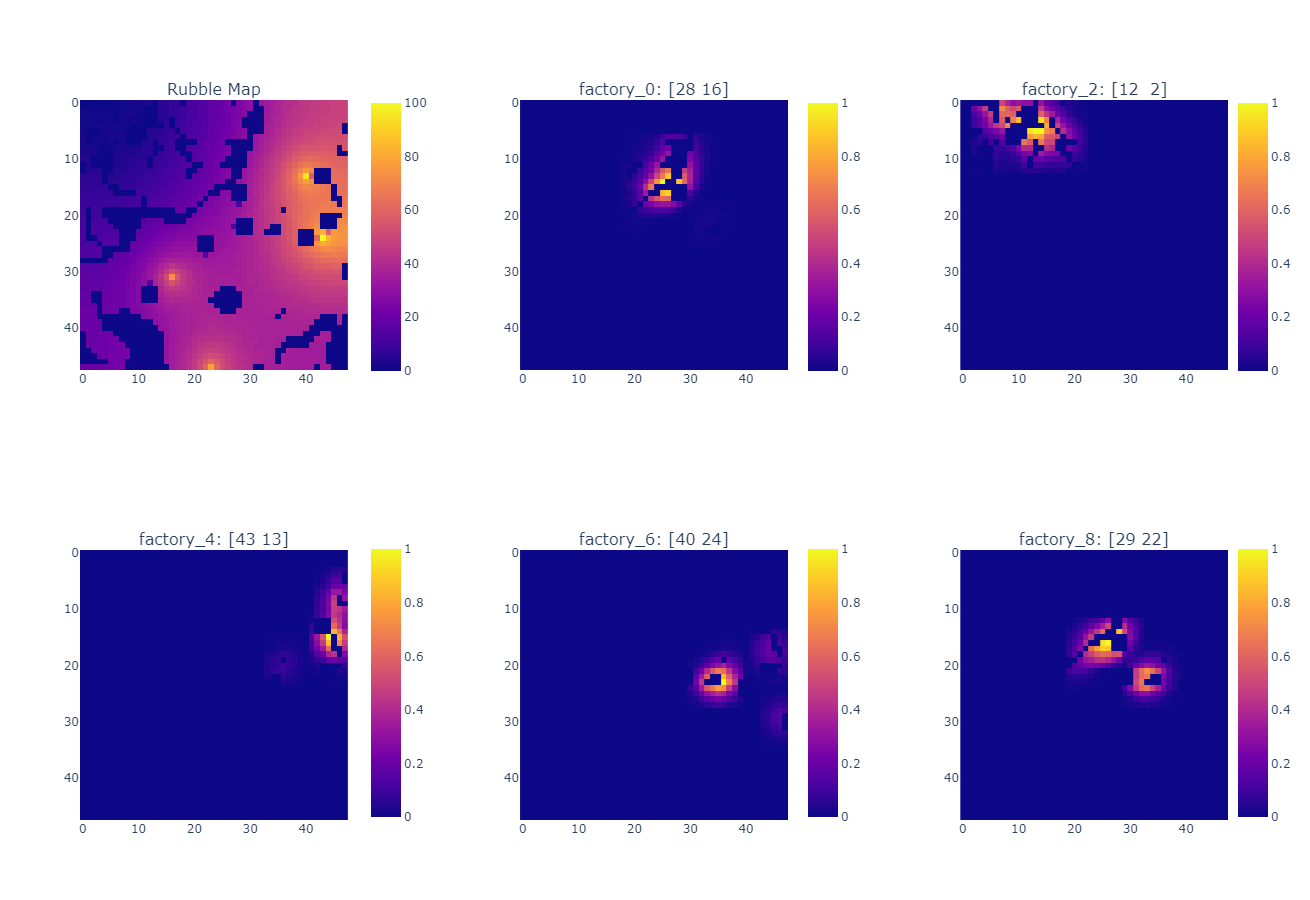

In [73]:
rubble = game_state.board.rubble

figs = []
figs.append(add_map(go.Figure().update_layout(title="Rubble Map"), rubble))
for factory_manager in agent.master.factories.friendly.values():
    final_value = RubbleDigValue(
        rubble,
        agent.master.maps.factory_maps.all,
        factory_manager.factory.pos,
        factory_dist=10,
    ).calculate_final_value()

    fig = go.Figure().update_layout(
        title=f"{factory_manager.factory.unit_id}: {factory_manager.factory.pos}"
    )
    add_map(fig, final_value)
    figs.append(fig)


fig = figures_to_subplots(figs)
fig.update_layout(height=900, width=1200)
fig.update_yaxes(autorange="reversed", matches="y")
fig.update_xaxes(matches="x")
fig.show()

### Now calculate a route for a unit to take for rubble clearing

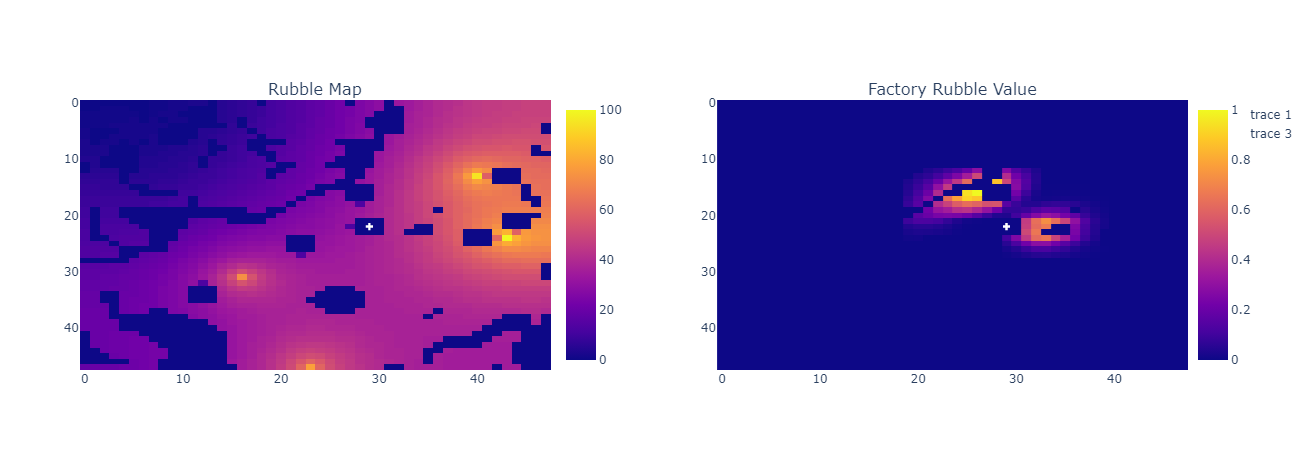

In [74]:
rubble = game_state.board.rubble
factory = agent.master.factories.friendly["factory_8"]
factory_pos = factory.factory.pos
all_factory_map = agent.master.maps.factory_maps.all

factory_rubble_values = RubbleDigValue(
    rubble, all_factory_map, factory_pos, factory_dist=10
).calculate_final_value()


figs = []
figs.append(add_map(go.Figure().update_layout(title="Rubble Map"), rubble))
figs.append(
    add_map(
        go.Figure().update_layout(title="Factory Rubble Value"), factory_rubble_values
    )
)

for fig in figs:
    fig.add_trace(
        go.Scatter(
            x=[factory_pos[0]],
            y=[factory_pos[1]],
            mode="markers",
            marker=dict(color="white", symbol="cross"),
        )
    )

fig = figures_to_subplots(figs)
fig.update_layout(height=450, width=800)
fig.update_yaxes(autorange="reversed", matches="y")
fig.update_xaxes(matches="x")
fig.show()

Thoughts:
- Probably best to assume unit could be starting anywhere?
    - Starting from anywhere good because then I can change what units are doing easily
    - Starting from factory good because then can ensure path cleared from factory expanding outward...
        - Unit will likely return to factory anyway so don't need to enforce this I think
        
    
- Multiply Factory values by manhattan dist around unit
    - Prefer digging near unit
    - Shouldn't be a super strong preference, should mostly do what factory wants
    
- Set pos to unit pos
- Calculate excess energy for unit to get back to factory from current position
    - Needs at least enough energy to get back to get more energy
    - if > X 
        - Check value under pos and adjacent
            - If value under pos is highest, queue dig until cleared
                - Mark cell as zero value
            - move to highest adjacent value
        - return to factory
- Mark that cell as zero value
- Move pos toward highest adjacent value


In [75]:
from util import (
    POWER,
    LIGHT_UNIT,
    HEAVY_UNIT,
    path_to_actions,
    nearest_non_zero,
    MOVE_DIRECTIONS,
    MOVE_DELTAS,
)
import copy
import math

from unit_manager import FriendlyUnitManger

In [76]:
from __future__ import annotations
from util import power_cost_of_actions
from util import (
    ACT_START_N,
    ACT_TYPE,
    TRANSFER,
    PICKUP,
    ACT_DIRECTION,
    ACT_RESOURCE,
    ACT_AMOUNT,
    DESTRUCT,
    RECHARGE,
    DIG,
    MOVE,
)
import logging




In [81]:
from scipy.ndimage import binary_dilation, generate_binary_structure
from rubble_clearing_planner import (
    calc_path_to_factory,
    power_cost_of_path,
    calc_value_to_move,
    calc_best_direction,
)

from util import add_direction_to_pos, find_border_coords, direction_to


# Setup unit
unit = copy.copy(LIGHT_UNIT)
unit.pos = np.array([29, 22])
unit.power = 100
unit.action_queue = []
factory_id = "factory_8"
# unit = FriendlyUnitManger(unit, agent.master, factory_id="factory_8")

# Setup other things that don't need to change
game_state = agent.master.game_state

unit_factory_id = agent.master.factories.friendly[factory_id].factory.strain_id
factory_loc = np.zeros_like(all_factory_map)
factory_loc[all_factory_map == unit_factory_id] = 1

# Set up initial variables
future_rubble = rubble.copy()
frubble_value = factory_rubble_values.copy()
pos = unit.pos


# If unit already on factory, pick up power and move to highest value around factory
if factory_loc[unit.pos[0], unit.pos[1]] >= 0:
    print(f"unit starting at factory")
    if unit.power < unit.unit_cfg.BATTERY_CAPACITY:
        print(f"unit topping up battery")
        unit.action_queue.append(
            unit.pickup(
                POWER,
                unit.power - unit.unit_cfg.BATTERY_CAPACITY - unit.unit_cfg.CHARGE,
            )
        )

    surrounding_coords = find_border_coords(all_factory_map, value=unit_factory_id)
    coors_with_values = [(frubble_value[x, y], (x, y)) for x, y in surrounding_coords]
    best_coord = list(sorted(coors_with_values, key=lambda v: v[0]))[-1][1]
    print(f"unit moving to {best_coord}")
    path = agent.master.pathfinder.path_fast(unit.pos, best_coord)
    pos = path[-1]
    unit.action_queue.extend(path_to_actions(path))

while len(unit.action_queue) < 20:
    action_queue_cost = power_cost_of_actions(game_state, unit, unit.action_queue)
    path_to_factory = calc_path_to_factory(agent.master.pathfinder, pos, factory_loc)
    cost_to_factory = power_cost_of_path(
        path_to_factory, future_rubble, unit_type=unit.unit_type
    )
    power_remaining = unit.power - action_queue_cost - cost_to_factory

    # If enough energy to do more things
    print(
        f"beginning of loop power: cost_to_factory={cost_to_factory}, action_cost={action_queue_cost}, power_remaining={power_remaining}"
    )
    if power_remaining > 5:
        unit_multiplier = pad_and_crop(
            0.9 ** manhattan_kernel(10), frubble_value, pos[0], pos[1], fill_value=0
        )
        value_array = frubble_value * unit_multiplier
        value_at_pos = value_array[pos[0], pos[1]]
        value_to_move = calc_value_to_move(pos, value_array)

        # If better to mine in current location, mine as much as power allows
        print(f"Value at pos={value_at_pos}, value to move={value_to_move}")
        if value_at_pos >= value_to_move and value_at_pos > 0:
            pos_rubble = rubble[pos[0], pos[1]]
            digs = np.ceil(pos_rubble / unit.unit_cfg.DIG_RUBBLE_REMOVED).astype(int)
            n = min(
                digs, np.floor(power_remaining / unit.unit_cfg.DIG_COST).astype(int)
            )
            print(f"digs={digs}, n={n}")
            if n >= digs:
                frubble_value[pos[0], pos[1]] = 0  # No more value there
                future_rubble[pos[0], pos[1]] = 0  # No more rubble
            unit.action_queue.append(unit.dig(n=n))

        # Otherwise move to next best spot
        elif value_to_move > 0:
            best_direction = calc_best_direction(pos, value_array)
            pos = add_direction_to_pos(pos, best_direction)
            unit.action_queue.append(unit.move(best_direction, n=1))

        # Not near any high value, move toward factory
        else:
            toward_factory = direction_to(
                pos, agent.masater.factories.friendly[factory_id].factory.pos
            )
            pos = add_direction_to_pos(pos, toward_factory)
            unit.action_queue.append(unit.move(toward_factory, n=1))
    else:
        path = calc_path_to_factory(
            agent.master.pathfinder, pos=pos, factory_loc=factory_loc
        )
        unit.action_queue.extend(path_to_actions(path))
        break

print(unit.action_queue)

unit starting at factory
unit topping up battery
unit moving to (31, 23)
[  2   0   4 -51   0   1]
[0 2 0 0 0 1]
[0 2 0 0 0 1]
[0 3 0 0 0 1]
beginning of loop power: cost_to_factory=1, action_cost=-44, power_remaining=143
Value at pos=0.5062379891260079, value to move=0.5907275826231845
[  2   0   4 -51   0   1]
[0 2 0 0 0 1]
[0 2 0 0 0 1]
[0 3 0 0 0 1]
[0 2 0 0 0 1]
beginning of loop power: cost_to_factory=4, action_cost=-41, power_remaining=137
Value at pos=0.6563639806924272, value to move=0.5577362895395763
digs=21, n=21
[  2   0   4 -51   0   1]
[0 2 0 0 0 1]
[0 2 0 0 0 1]
[0 3 0 0 0 1]
[0 2 0 0 0 1]
[ 3  0  0  0  0 21]
beginning of loop power: cost_to_factory=4, action_cost=64, power_remaining=32
Value at pos=0.0, value to move=0.5577362895395763
[  2   0   4 -51   0   1]
[0 2 0 0 0 1]
[0 2 0 0 0 1]
[0 3 0 0 0 1]
[0 2 0 0 0 1]
[ 3  0  0  0  0 21]
[0 1 0 0 0 1]
beginning of loop power: cost_to_factory=4, action_cost=65, power_remaining=31
Value at pos=0.619706988377307, value to m

In [37]:
unit.action_queue

[array([  2,   0,   4, -51,   0,   1]),
 array([0, 2, 0, 0, 0, 1]),
 array([0, 2, 0, 0, 0, 1]),
 array([0, 3, 0, 0, 0, 1]),
 array([0, 2, 0, 0, 0, 1]),
 array([ 3,  0,  0,  0,  0, 21]),
 array([0, 1, 0, 0, 0, 1]),
 array([3, 0, 0, 0, 0, 6]),
 array([0, 4, 0, 0, 0, 1]),
 array([0, 4, 0, 0, 0, 1])]

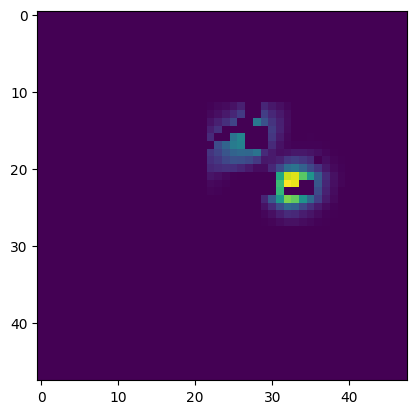

In [38]:
plt.imshow(value_array.T)

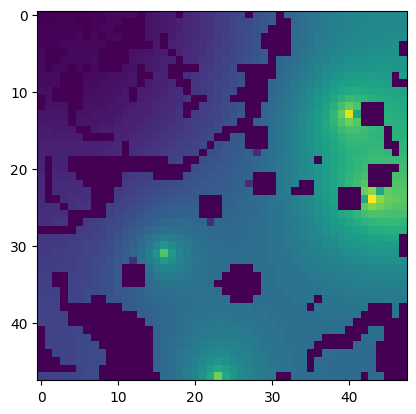

In [39]:
plt.imshow(rubble.T)